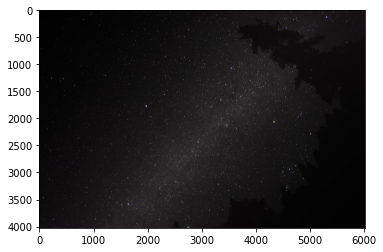

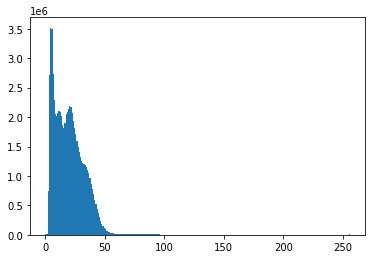

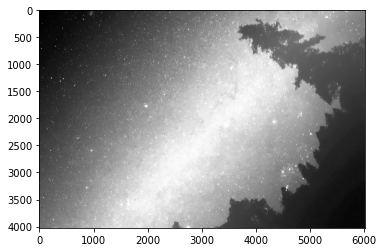

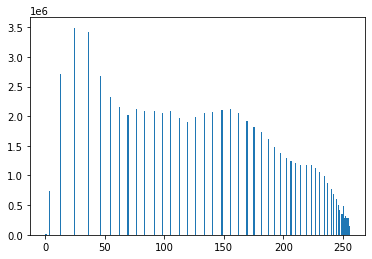

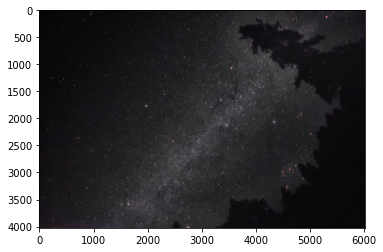

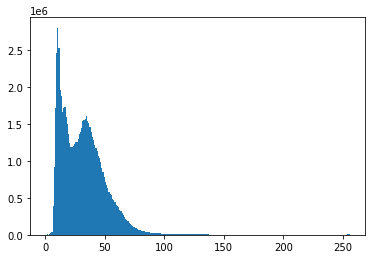

True

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imgBGR = cv2.imread('E:\Chiranjeev\Pictures\Lightroom Edits\DSC02584_ps.jpg')
imgRGB = cv2.cvtColor(imgBGR,cv2.COLOR_BGR2RGB)
imgplot = plt.imshow(imgRGB)
plt.show()

plt.hist(imgRGB.ravel(),256,[0,256])
plt.show()
imgGray = cv2.cvtColor(imgBGR,cv2.COLOR_BGR2GRAY)

# global contrast is normalised using cdn 

equ = cv2.equalizeHist(imgGray)
equ = cv2.cvtColor(equ,cv2.COLOR_GRAY2RGB)
imgplot = plt.imshow(equ)
plt.show()

plt.hist(equ.ravel(),256,[0,256])
plt.show()

# clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
# cl1 = clahe.apply(imgGray)
# cl1 = cv2.cvtColor(cl1,cv2.COLOR_GRAY2RGB)
# imgplot = plt.imshow(cl1)
# plt.show()

# localised normalization of contrast

clahe_model = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(12,12))
colorimage_b = clahe_model.apply(imgBGR[:,:,0])
colorimage_g = clahe_model.apply(imgBGR[:,:,1])
colorimage_r = clahe_model.apply(imgBGR[:,:,2])
colorimage_clahe = np.stack((colorimage_b,colorimage_g,colorimage_r), axis=2)

imgplot = plt.imshow(colorimage_clahe)
plt.show()

plt.hist(colorimage_clahe.ravel(),256,[0,256])
plt.show()
cv2.imwrite('test.jpg',colorimage_clahe)


In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv2.imread('E:\Chiranjeev\Pictures\Lightroom Edits\DSC02584_ps.jpg')
hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
hist = cv.calcHist( [hsv], [0, 1], None, [180, 256], [0, 180, 0, 256] )
plt.imshow(hist,interpolation = 'nearest')
plt.show()

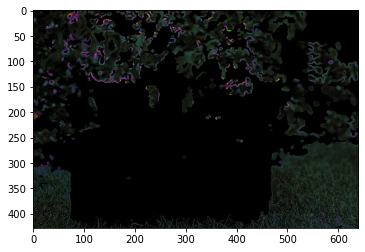

In [34]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('../Resources/Photos/cats.jpg')
roi = cv2.imread('../Resources/Photos/ROI.PNG')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
roi = cv2.cvtColor(roi,cv2.COLOR_BGR2RGB)
hsv_img = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
hsv_roi = cv2.cvtColor(roi,cv2.COLOR_RGB2HSV)

roi_hist = cv2.calcHist([hsv_roi],[0,1],None,[180,256],[0,180,0,256])
# imgplot = plt.imshow(roi_hist)
# plt.show()
mask = cv2.calcBackProject([hsv_img],[0,1],roi_hist,[0,180,0,256],1)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
mask = cv2.filter2D(mask,-1,kernel)
_,mask = cv2.threshold(mask,14,255,cv2.THRESH_BINARY)


mask = cv2.merge((mask, mask, mask))
result = cv2.bitwise_and(img, mask)

result = cv2.cvtColor(result,cv2.COLOR_HSV2RGB)
imgplot = plt.imshow(result)
plt.show()